In [1]:
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from datetime import datetime, timedelta
import time as time_lib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [14]:
MAIN_FOLDER ='C:\\Users\\Tee\\senior_project\\src\\Data_preparetion\\Dataset_Cleaning_and_Creation'
clearskyfile = 'clearsky_data.csv'
measurementfile = 'ims.csv'
cloudfile = 'ci_cloudmask.csv' # can select cloud type (overview (ch red) or cloudmask)

In [15]:
clearsky_df = pd.read_csv(os.path.join(MAIN_FOLDER,clearskyfile),parse_dates=['Datetime'],index_col='Datetime')
ims_df = pd.read_csv(os.path.join(MAIN_FOLDER,measurementfile),parse_dates=['Datetime'],index_col='Datetime')
clearsky_df.index = clearsky_df.index.tz_convert('Asia/Bangkok')
ims_df.drop(columns=['Unnamed: 0'],inplace=True)

In [16]:
ci_df = pd.read_csv(os.path.join(MAIN_FOLDER,cloudfile),parse_dates=['Datetime'],index_col='Datetime')
ci_df.drop(columns=['Unnamed: 0'], inplace = True)
ci_df = ci_df.rename(columns={'site':'site_name'})
ci_df.index = ci_df.index.tz_convert('Asia/Bangkok')
ci_df.index = ci_df.index + timedelta(minutes=30) # delay time of cloud images

# Measurement data cleaning

In [17]:
ims_df.groupby(by=['site_name']).mean() # check mean of I each station (ISL032, ISL054 is lower than other)

,ims_wpm2
site_name,
ISL001,400.563988
ISL002,396.014778
ISL003,395.093695
ISL004,412.336012
ISL005,433.194108
ISL006,386.382176
ISL007,395.024883
ISL008,418.616456
ISL009,410.450316


<AxesSubplot:xlabel='Datetime'>

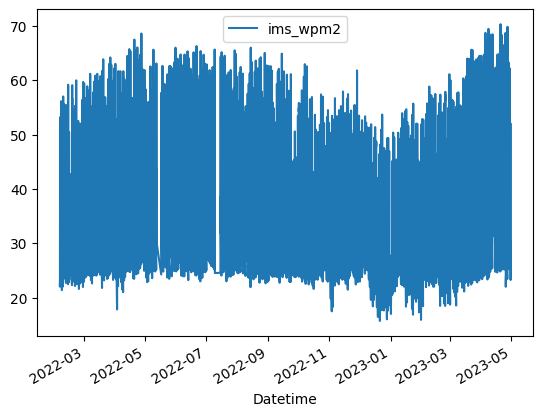

In [18]:
ims_df[ims_df.site_name =='ISL054'].plot() # check I at ISL054

<AxesSubplot:xlabel='Datetime'>

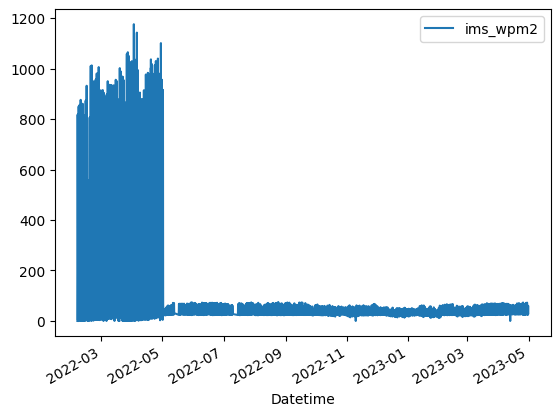

In [19]:
ims_df[ims_df.site_name =='ISL032'].plot() # check I at ISL032

In [20]:
ims_df = ims_df[-(ims_df.site_name=="ISL054")]
ims_df = ims_df[-((ims_df.site_name=="ISL032")&(ims_df.index.month >= 5))]

In [21]:
maxI = ims_df.groupby(by=['site_name',ims_df.index.date]).max()
maxI.reset_index(level=0, inplace=True)
maxI

,site_name,ims_wpm2
2020-01-02,ISL001,747.5882
2020-01-03,ISL001,743.2864
2020-01-04,ISL001,743.9594
2020-01-05,ISL001,755.4311
2020-01-06,ISL001,776.4430
...,...,...
2023-04-26,ISL056,385.8570
2023-04-27,ISL056,1013.0580
2023-04-28,ISL056,951.9244
2023-04-29,ISL056,975.0139


In [22]:
countI = ims_df.groupby(by=['site_name',ims_df.index.date]).count()
countI.reset_index(level=0, inplace=True)
countI.sort_values('ims_wpm2').head(20)

,site_name,ims_wpm2
2021-09-25,ISL001,1
2023-01-19,ISL004,1
2023-01-26,ISL002,1
2022-08-01,ISL053,1
2023-02-24,ISL007,1
2023-03-20,ISL005,1
2021-09-02,ISL001,1
2022-10-19,ISL005,1
2021-12-03,ISL005,1
2020-08-31,ISL001,1


In [23]:
t = pd.merge(maxI,countI,on=[maxI.index, 'site_name']).sort_values('ims_wpm2_y')
t.set_index('key_0', inplace = True)
t.index.name = 'Date'
t.rename(columns = {'ims_wpm2_x':'max_I', 'ims_wpm2_y':'nsample'}, inplace=True)

In [24]:
t[t.max_I == 0]

,site_name,max_I,nsample
Date,,,
2021-09-25,ISL001,0.0,1
2023-01-19,ISL004,0.0,1
2023-02-24,ISL007,0.0,1
2021-09-02,ISL001,0.0,1
2022-10-19,ISL005,0.0,1
...,...,...,...
2022-11-08,ISL013,0.0,25
2022-11-17,ISL013,0.0,25
2022-11-18,ISL013,0.0,25


In [25]:
idf = ims_df.copy()
idf['Date'] = idf.index.date
idf.reset_index(inplace=True)
idf.set_index('Date',inplace=True)

In [26]:
out = pd.merge(t[t.max_I==0][['site_name']],idf,on=['Date','site_name']).reset_index().drop_duplicates().drop(columns=['Date'])

In [27]:
ims_df = pd.concat([idf,out]).drop_duplicates(keep=False)

In [28]:
ims_df.set_index('Datetime', inplace=True)

In [ ]:
#ims_df.to_csv('ims_cleaned.csv')

# Dataset creation

In [136]:
ims_df = ims_df.between_time('8:00','16:00')
df = pd.merge(ims_df,clearsky_df,on=['Datetime', 'site_name']).copy()
df = df.between_time('8:00','16:00')
df['k'] = df.ims_wpm2/df.Iclr
df['date'] = df.index.date

In [138]:
kmean=df[['site_name','k']].groupby(by=[df.index.date,'site_name']).mean()
kmean = kmean.reset_index(level=1)
kmean.reset_index(inplace=True)
kmean = kmean.rename(columns={'index':'date','k':'k_bar'})
kmean = pd.merge(df,kmean,on=['date','site_name'])
kmean.index = df.index
df['k_bar'] = kmean.k_bar
df.drop(columns=['date'],inplace=True)
df['HR'] = df.index.hour

In [139]:
df

,site_name,ims_wpm2,Iclr,k,k_bar,HR
Datetime,,,,,,
2022-02-01 08:00:00+07:00,ISL001,221.1656,165.166337,1.339048,0.918205,8
2022-02-01 08:30:00+07:00,ISL001,246.9549,279.267255,0.884296,0.918205,8
2022-02-01 09:00:00+07:00,ISL001,329.6634,390.741119,0.843688,0.918205,9
2022-02-01 09:30:00+07:00,ISL001,276.1461,494.161308,0.558818,0.918205,9
2022-02-01 10:00:00+07:00,ISL001,528.1857,586.234040,0.900981,0.918205,10
...,...,...,...,...,...,...
2023-02-05 14:00:00+07:00,ISL056,751.5654,753.062709,0.998012,1.067391,14
2023-02-05 14:30:00+07:00,ISL056,619.3484,692.442152,0.894441,1.067391,14
2023-02-05 15:00:00+07:00,ISL056,616.7516,615.957309,1.001290,1.067391,15


In [159]:
# CI0 , CI1 are CI(t-1) , CI(t-2) respectively
clag = ci_df[['site_name','CI']].copy()
clag1 = clag.shift(freq='+30T') # for lag time merging
clag = clag.merge(clag1,on=['Datetime','site_name'],how='inner')
clag = clag.rename(columns={'CI_x':'CI0','CI_y':'CI1'})

In [160]:
process = pd.merge(df,clag,on=['Datetime','site_name'],how='inner')
process = process.rename(columns={'ims_wpm2':'I'})
process = pd.merge(process,ci_df.drop(columns=['CI']),on=['Datetime','site_name'],how='inner')
process

,site_name,I,Iclr,k,k_bar,HR,CI0,CI1,CI_1,CI_2,...,CI_16,CI_17,CI_18,CI_19,CI_20,CI_21,CI_22,CI_23,CI_24,CI_25
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-23 10:00:00+07:00,ISL001,805.9780,732.769967,1.099906,0.620564,10,0.466667,0.349020,0.486275,0.486275,...,0.482353,0.466667,0.466667,0.466667,0.439216,0.482353,0.482353,0.443137,0.443137,0.443137
2022-03-23 10:30:00+07:00,ISL001,512.6390,812.250731,0.631134,0.620564,10,0.364706,0.466667,0.349020,0.349020,...,0.427451,0.364706,0.364706,0.364706,0.368627,0.427451,0.427451,0.372549,0.372549,0.372549
2022-03-23 11:00:00+07:00,ISL001,494.7877,874.980215,0.565484,0.620564,11,0.513725,0.364706,0.541176,0.541176,...,0.486275,0.513725,0.513725,0.513725,0.572549,0.486275,0.486275,0.556863,0.556863,0.556863
2022-03-23 11:30:00+07:00,ISL001,314.8849,919.727489,0.342368,0.620564,11,0.494118,0.513725,0.458824,0.458824,...,0.470588,0.494118,0.494118,0.494118,0.521569,0.470588,0.470588,0.498039,0.498039,0.498039
2022-03-23 12:00:00+07:00,ISL001,297.7652,945.634812,0.314884,0.620564,12,1.000000,0.494118,0.905882,0.905882,...,0.725490,1.000000,1.000000,1.000000,0.858824,0.725490,0.725490,0.968627,0.968627,0.968627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 14:00:00+07:00,ISL056,751.5654,753.062709,0.998012,1.067391,14,0.258824,0.254902,0.258824,0.258824,...,0.258824,0.258824,0.258824,0.258824,0.262745,0.262745,0.258824,0.278431,0.278431,0.262745
2023-02-05 14:30:00+07:00,ISL056,619.3484,692.442152,0.894441,1.067391,14,0.254902,0.258824,0.254902,0.254902,...,0.254902,0.254902,0.254902,0.254902,0.266667,0.262745,0.254902,0.278431,0.278431,0.266667
2023-02-05 15:00:00+07:00,ISL056,616.7516,615.957309,1.001290,1.067391,15,0.254902,0.254902,0.262745,0.262745,...,0.262745,0.254902,0.254902,0.254902,0.262745,0.262745,0.254902,0.274510,0.274510,0.262745


In [157]:
process.to_csv('DATASET_cloudmask.csv')

# Ihat & I merging for validation

In [6]:
IHAT_V1 = 'ihat_only_modelv1.csv'
IHAT_V2 = 'ihat_only_modelv2.csv'
IMS_CLEAN = 'ims_cleaned.csv'

In [11]:
idf = pd.read_csv(os.path.join(MAIN_FOLDER,IMS_CLEAN),parse_dates=['Datetime'],index_col='Datetime')
ip1df =  pd.read_csv(os.path.join(MAIN_FOLDER,IHAT_V1),parse_dates=['Datetime'],index_col='Datetime')
ip2df =  pd.read_csv(os.path.join(MAIN_FOLDER,IHAT_V2),parse_dates=['Datetime'],index_col='Datetime')

In [13]:
ip1df = pd.merge(idf,ip1df,on=['Datetime','site_name'],how='inner')
ip2df = pd.merge(idf,ip2df,on=['Datetime','site_name'],how='inner')

In [ ]:
#ip1df.to_csv('ihat_modelv1.csv')
#ip2df.to_csv('ihat_modelv2.csv')